# TensorFlow: tf.layers
------
Modified based on MorvanZhou's [Tensorflow-Tutorial](https://github.com/MorvanZhou/Tensorflow-Tutorial/blob/master/tutorial-contents/301_simple_regression.py)


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.set_random_seed(1)
np.random.seed(1)

In [2]:
# input data
n = 1000
x = np.linspace(-1.0,1.0, num=n)
x = x[np.random.permutation(n)]
y = pow(x, 2)+0.2 * np.random.rand(n)   

x = x.reshape((n,1))
y = y.reshape((n,1))

In [3]:
# Create the model
tf_x = tf.placeholder(tf.float32, [None, 1])     # input x
tf_y = tf.placeholder(tf.float32, [None, 1])     # input y

l1 = tf.layers.dense(tf_x, 100, tf.nn.relu)         # hidden layer
output = tf.layers.dense(l1, 1)                     # output layer

In [4]:
# Define loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, output)   # compute cost
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train_op = optimizer.minimize(loss)

In [5]:
# Train
sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())         # initialize var in graph

for step in range(10000):
    # train and net output
    _, l, y_pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})

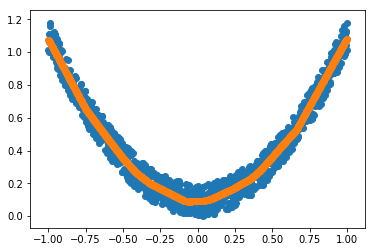

In [6]:
# Visualize prediction
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x[:,0], y[:,0])
ax.scatter(x[:,0], y_pred[:,0])
plt.show()